In [71]:
import numpy as np
import pandas as pd
import mca
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#https://www.kaggle.com/kaggle/kaggle-survey-2018/home
raw = pd.read_csv('dsSurvey.csv')
print(raw.shape)
raw.head()

(23860, 395)


c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q49_OTHER_TEXT,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT
0,Duration (in seconds),What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education ...,Which best describes your undergraduate major?...,Select the title most similar to your current ...,Select the title most similar to your current ...,In what industry is your current employer/cont...,...,What tools and methods do you use to make your...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...
1,710,Female,-1,45-49,United States of America,Doctoral degree,Other,Consultant,-1,Other,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,...,-1,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,621,Male,-1,35-39,United States of America,Master’s degree,"Social sciences (anthropology, psychology, soc...",Not employed,-1,NaN,...,-1,NaN,NaN,Requires too much technical knowledge,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1


# Simple dataset with only 10 cols

In [19]:
subset = raw[['Q1', 'Q2', 'Q4', 'Q5','Q7', 'Q9', 'Q17', 'Q22', 'Q24', 'Q25']]
subset.columns = ['gender', 'age', 'edu', 'major','industry','compensation',
                  'primlanguage', 'viz','yrscode', 'yrsML']
subset.head()

,gender,age,edu,major,industry,compensation,primlanguage,viz,yrscode,yrsML
0,What is your gender? - Selected Choice,What is your age (# years)?,What is the highest level of formal education ...,Which best describes your undergraduate major?...,In what industry is your current employer/cont...,What is your current yearly compensation (appr...,What specific programming language do you use ...,Of the choices that you selected in the previo...,How long have you been writing code to analyze...,For how many years have you used machine learn...
1,Female,45-49,Doctoral degree,Other,Other,NaN,NaN,NaN,I have never written code but I want to learn,I have never studied machine learning but plan...
2,Male,30-34,Bachelor’s degree,Engineering (non-computer focused),Manufacturing/Fabrication,"10-20,000",NaN,NaN,I have never written code but I want to learn,I have never studied machine learning but plan...
3,Female,30-34,Master’s degree,"Computer science (software engineering, etc.)",I am a student,"0-10,000",Java,ggplot2,5-10 years,< 1 year
4,Male,35-39,Master’s degree,"Social sciences (anthropology, psychology, soc...",NaN,NaN,Python,ggplot2,5-10 years,4-5 years


# However, numeric analyses are limited unless we dummy-encode the data, which explodes our attributes to 133. If this data were being used in concert with other, numerical columns, this may be prohibitively slow.

In [30]:
#Drop informational row
subset = subset.iloc[1:,:]
subset.nunique()

gender           4
age             12
edu              7
major           13
industry        19
compensation    19
primlanguage    17
viz             12
yrscode         10
yrsML           10
dtype: int64

In [32]:
df = pd.get_dummies(subset)
df = df.fillna(value='Other/NA')
print(df.shape)

(23859, 123)


# We could use PCA to reduce the boolean columnset:

Explained Variance:  [0.07254557 0.05873082 0.05273179 0.04633949 0.04325048 0.04159095
 0.03722039 0.03432881 0.0305478  0.03004345]

Explained Variance (first 10 components):  0.44732955097878224


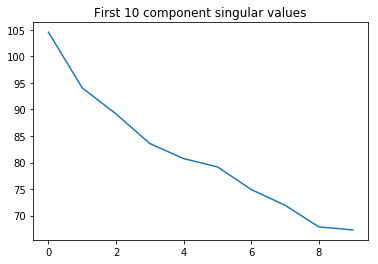

In [46]:
pca = PCA(n_components=10)

pcacomps = pca.fit_transform(df)

#How much did 10 components capture?
print('Explained Variance: ',pca.explained_variance_ratio_)
print('\nExplained Variance (first 10 components): ',np.sum(pca.explained_variance_ratio_))
plt.plot(pca.singular_values_)
plt.title('First 10 component singular values')
plt.show()

In [ ]:
#There's no quantitative way to assess what of our original data is being captured
#However, we can get a sense of that visually with the first 2 dimensions:
sns.set_palette("Set1")
fig = plt.figure(figsize=[15,20])
for i,col in enumerate(subset.columns):
    fig.add_subplot(4,3,i+1)
    sns.scatterplot(x=pcacomps[:,0], y=pcacomps[:,1], hue=subset[col], 
                    alpha=.5, legend=False)
    plt.title(col)
plt.show()

# MCA as an informative alternative

In [57]:
print(mca.MCA.__doc__)

Run MCA on selected columns of a pd DataFrame.
	
	If the column are specified, assume that they hold
	categorical variables that need to be replaced with
	dummy indicators, otherwise process the DataFrame as is.

	'cols': The columns of the DataFrame to process.
	'ncols': The number of columns before dummy coding. To be passed if cols isn't.
	'benzecri': Perform Benzécri correction (default: True)
	'TOL': value below which to round eigenvalues to zero (default: 1e-4)
	


In [89]:
print(type(df))
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
(23859, 123)


In [88]:
mc = mca.MCA(df)

ValueError: array is too big; `arr.size * arr.dtype.itemsize` is larger than the maximum possible size.

In [86]:
mc.inertia

0.3364159975370665

In [78]:
dir(np.zeros)

['__call__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__self__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__text_signature__']